In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def create_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        X[ix] = np.c_[np.random.randn(samples)*.1 + (class_number)/3, np.random.randn(samples)*.1 + 0.5]
        y[ix] = class_number
    return X,y

In [10]:
verticaldata = create_data(100, 2)

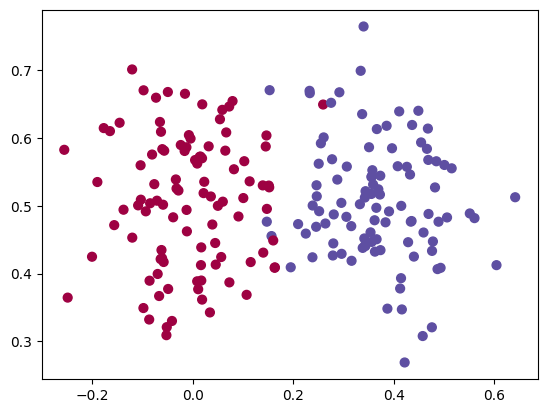

In [11]:
data = np.random.permutation([np.concatenate((verticaldata[0][i],[verticaldata[1][i]]), axis=0).tolist() for i in range(len(verticaldata[0]))])
x = data[:,:2]
y = data[:, 2]
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [12]:
print(x.shape, y.shape)
print(x[0],y[0])

(200, 2) (200,)
[0.15293738 0.67071238] 1.0


In [39]:
def forword(x, w, b):
    return np.dot(x, w) + b

In [14]:
# test
w1 = [[2],[3]]
x1 = [[1,2],[3,4]]
b1 = 1
forword(x1,w1,b1)

array([[ 9],
       [19]])

In [65]:
def binaryCrossEntropyLoss(y, y_pred):
    res = []
    for i in range(len(y)):
        a = 0
        if y[i] == 1:
            a = y[i] * np.log((y_pred[i].item() if y_pred[i].item() > 0 else -y_pred[i].item() ))
        elif y[i] == 0:
            a = (1-y[i]) * np.log(1-y_pred[i].item() if 1-y_pred[i].item() > 0 else -1 * -y_pred[i].item())
        
        res.append(a)
    return -np.mean(res)

In [16]:
def accuracy(y,y_pred):
    if len(y.shape) == 1:
        '''
        y_pred = [
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ]
        y = [0,1,1]
        '''
        return np.mean(np.argmax(y_pred, axis=1) == y)
    elif len(y.shape) == 2:
        '''
          ypred = [
            [0.7, 0.1,0.2],
            [0.1, 0.5, 0.4], 
            [0.02,0.9, 0.08]
        ]
        y = [
            [1,0,0],
            [0,1,0],
            [0,1,0]
        ]
        '''
        return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))
    return

In [17]:
def gradient_classification(w, b, x, y, y_pred, lr = 0.01):
    error = y_pred - y
    w = w - (np.sum(x * 2) * error).mean() * lr
    b = b - (error * 2).mean() * lr
    

    return w,b

In [18]:
def getRandomWeight(*r):
    #return np.random.randn(*r)
    return np.zeros(r) + 0.1

In [19]:
def softmax(value):
    value = np.exp(value)
    total = sum(value)
    return list(map(lambda a: a / total, value))

In [20]:
np.exp(0.5) 

1.6487212707001282

In [66]:
w = getRandomWeight(2,1)
b = getRandomWeight(1)
for i in range(100) :
    y_pred = forword(x, w, b)
    #activation
    loss = binaryCrossEntropyLoss(y,y_pred)
    w,b = gradient_classification(w,b,x,y,y_pred)
    print(f"Epoch: {i+1}, Loss: {loss}, Accuracy: {accuracy(y, y_pred)} ")
    

Epoch: 1, Loss: 0.9197191426635982, Accuracy: 0.5 
Epoch: 2, Loss: 0.5051696352732488, Accuracy: 0.5 
Epoch: 3, Loss: 0.7832185985953385, Accuracy: 0.5 
Epoch: 4, Loss: 0.5001261699254124, Accuracy: 0.5 
Epoch: 5, Loss: 0.7021861691354802, Accuracy: 0.5 
Epoch: 6, Loss: 0.48589880249648026, Accuracy: 0.5 
Epoch: 7, Loss: 0.6495221364522211, Accuracy: 0.5 
Epoch: 8, Loss: 0.48000550020739674, Accuracy: 0.5 
Epoch: 9, Loss: 0.6134447834841491, Accuracy: 0.5 
Epoch: 10, Loss: 0.4783000322749028, Accuracy: 0.5 
Epoch: 11, Loss: 0.5878467407117463, Accuracy: 0.5 
Epoch: 12, Loss: 0.47888260185244164, Accuracy: 0.5 
Epoch: 13, Loss: 0.5692126907591818, Accuracy: 0.5 
Epoch: 14, Loss: 0.48068305415097734, Accuracy: 0.5 
Epoch: 15, Loss: 0.5553753090207835, Accuracy: 0.5 
Epoch: 16, Loss: 0.4830657090060803, Accuracy: 0.5 
Epoch: 17, Loss: 0.5449324257568035, Accuracy: 0.5 
Epoch: 18, Loss: 0.48564961844940024, Accuracy: 0.5 
Epoch: 19, Loss: 0.5369440547120848, Accuracy: 0.5 
Epoch: 20, Loss: